In [ ]:
!pwd

/content


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data


In [ ]:

##When using Google Colab

#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#df = pd.read_csv("/content/drive/MyDrive/CodingGoogleColab/contrast-fel.csv", sep=',')
df=pd.read_csv("contrast-fel.csv", sep=',')



In [ ]:
df


,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length
0,1,1,0.000,0.000,0.000,1.0,1.000,1.000,1.000,0.000
1,2,1,7.599,1.386,0.344,17.0,0.010,0.018,0.333,735.125
2,3,1,1.127,0.602,0.315,10.0,0.237,0.303,-1.000,179.093
3,4,1,1.392,0.841,0.469,13.0,0.316,0.398,-1.000,240.017
4,5,1,4.397,0.321,4.648,17.0,0.049,0.074,0.250,835.186
...,...,...,...,...,...,...,...,...,...,...
188,189,1,0.429,0.138,0.300,20.0,0.562,0.642,-1.000,77.101
189,190,1,0.823,1.435,0.198,28.0,0.043,0.068,0.200,234.654
190,191,1,0.818,0.553,0.198,37.0,0.062,0.093,-1.000,139.287
191,192,1,0.691,0.241,0.330,47.0,0.600,0.677,-1.000,110.238


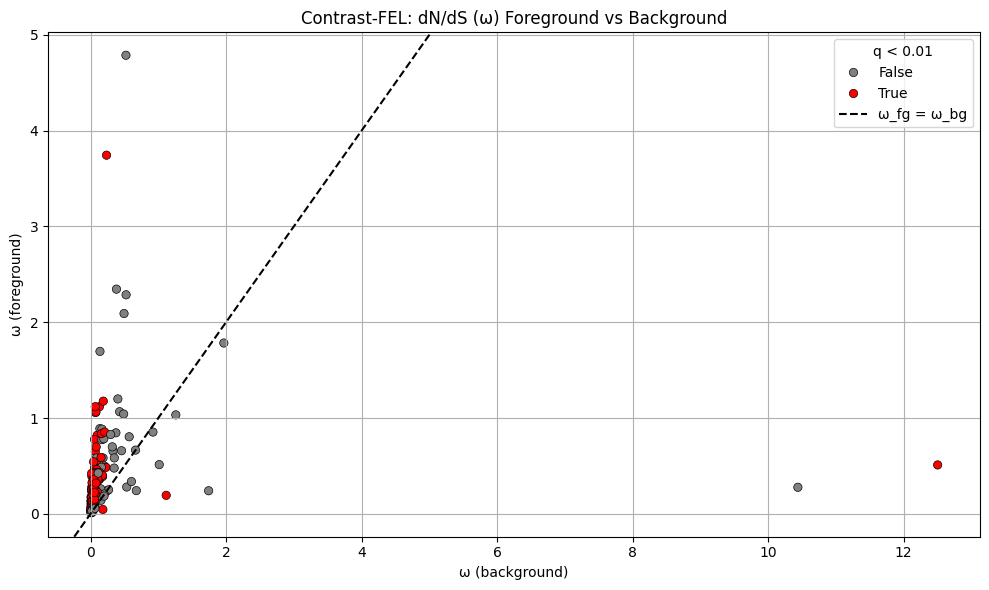

Top significant sites (p < 0.05):
    Site  omega_background  omega_foreground  Q-value (overall)
8      9          0.089552          0.366350                0.0
7      8          0.007614          0.032995                0.0
11    12          0.057569          0.196162                0.0
10    11          0.136108          0.362205                0.0
12    13          0.047351          0.412627                0.0
17    18          0.036274          0.217642                0.0
15    16          0.059880          0.307784                0.0
14    15          0.070819          0.343003                0.0
25    26          0.098820          0.820059                0.0
24    25          0.070959          0.649146                0.0


In [ ]:
# Filter invalid alpha values to avoid division by zero
df = df[df["alpha"] > 0]
df = df[df["beta (background)"] > 0]
df = df[df["beta (Foreground)"] > 0]


# Compute omega
df["omega_background"] = df["beta (background)"] / df["alpha"]
df["omega_foreground"] = df["beta (Foreground)"] / df["alpha"]

# Filter for significant sites
df["significant"] = df["Q-value (overall)"] < 0.05

# Plot ω_foreground vs ω_background
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="omega_background",
    y="omega_foreground",
    hue="significant",
    palette={True: "red", False: "grey"},
    edgecolor="black"
)

plt.axline((0, 0), slope=1, linestyle='--', color='black', label="ω_fg = ω_bg")
plt.xlabel("ω (background)")
plt.ylabel("ω (foreground)")
plt.title("Contrast-FEL: dN/dS (ω) Foreground vs Background")
plt.legend(title="q < 0.01")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print top significant sites
print("Top significant sites (p < 0.05):")
print(df[df["significant"]].sort_values("Q-value (overall)")[["Site", "omega_background", "omega_foreground", "Q-value (overall)"]].head(10))

In [ ]:
df = df.sort_values("Site")
df

,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length,omega_background,omega_foreground,significant
1,2,1,7.599,1.386,0.344,17.0,0.010,0.018,0.333,735.125,0.182392,0.045269,False
2,3,1,1.127,0.602,0.315,10.0,0.237,0.303,-1.000,179.093,0.534161,0.279503,True
3,4,1,1.392,0.841,0.469,13.0,0.316,0.398,-1.000,240.017,0.604167,0.336925,True
4,5,1,4.397,0.321,4.648,17.0,0.049,0.074,0.250,835.186,0.073004,1.057084,False
5,6,1,3.038,0.329,0.654,16.0,0.235,0.302,-1.000,323.347,0.108295,0.215273,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,1,0.429,0.138,0.300,20.0,0.562,0.642,-1.000,77.101,0.321678,0.699301,True
189,190,1,0.823,1.435,0.198,28.0,0.043,0.068,0.200,234.654,1.743621,0.240583,False
190,191,1,0.818,0.553,0.198,37.0,0.062,0.093,-1.000,139.287,0.676039,0.242054,True
191,192,1,0.691,0.241,0.330,47.0,0.600,0.677,-1.000,110.238,0.348770,0.477569,True


In [ ]:
df.sort_values("significant")

,Site,Partition,alpha,beta (background),beta (Foreground),subs (Foreground),P-value (overall),Q-value (overall),Permutation p-value,Total branch length,omega_background,omega_foreground,significant,sig_perm_and_omega_gt1
59,60,1,0.945,0.354,0.799,78.0,0.182,0.241,-1.0,189.421,0.374603,0.845503,False,False
163,164,1,0.966,0.024,0.036,39.0,0.354,0.433,-1.0,76.361,0.024845,0.037267,False,False
164,165,1,0.589,0.021,0.056,66.0,0.036,0.058,1.0,50.715,0.035654,0.095076,False,False
53,54,1,0.622,0.251,0.746,50.0,0.310,0.393,-1.0,149.482,0.403537,1.199357,False,True
52,53,1,0.821,0.137,0.636,72.0,0.096,0.138,-1.0,140.236,0.166870,0.774665,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,1,1.012,0.041,0.350,101.0,0.000,0.000,1.0,113.964,0.040514,0.345850,True,False
92,93,1,0.878,0.030,0.143,76.0,0.000,0.000,1.0,81.699,0.034169,0.162870,True,False
93,94,1,1.149,0.025,0.079,75.0,0.012,0.020,0.5,94.057,0.021758,0.068755,True,False
119,120,1,0.839,0.019,0.113,72.0,0.000,0.000,1.0,74.512,0.022646,0.134684,True,False


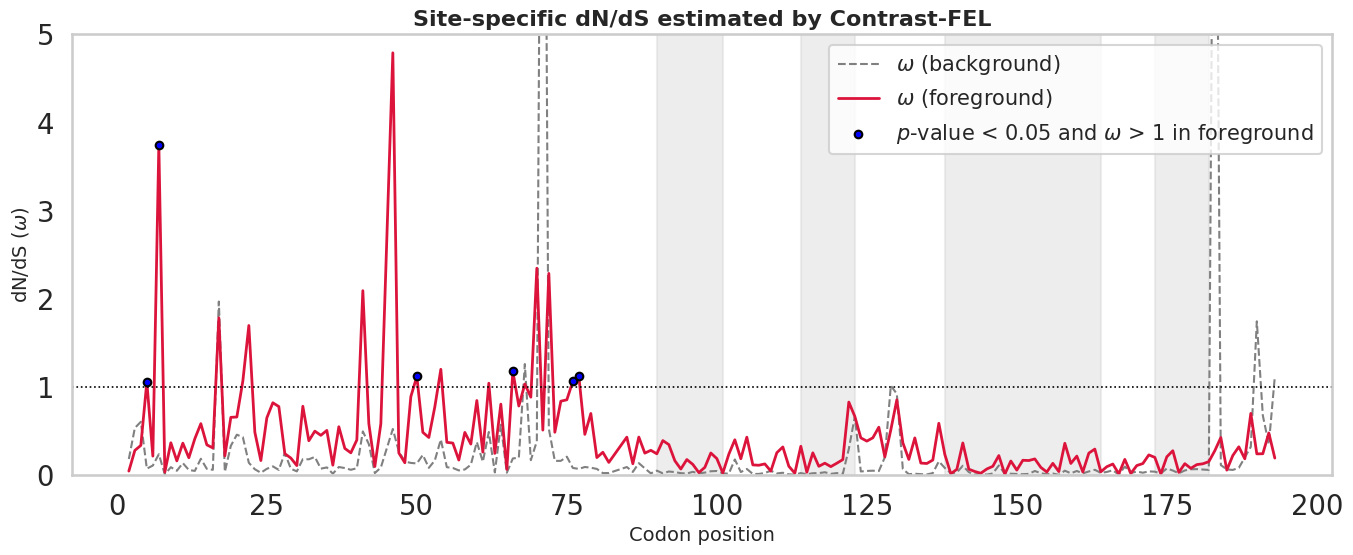

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add a new column for sites with permuted p-value and omega > 1
#df["sig_perm_and_omega_gt1"] = (df["Permutation p-value"].notnull()) & (df["omega_foreground"] > 1)
df["sig_perm_and_omega_gt1"] = (df["P-value (overall)"] < 0.05) & (df["omega_foreground"] > 1)

# Set a more elegant style
sns.set(style="whitegrid", context="talk", font_scale=1.2)

# Sort by site number
df = df.sort_values("Site")

# Create the plot
plt.figure(figsize=(14, 6))

# Plot background and foreground omega values
plt.plot(df["Site"], df["omega_background"], label=r"$\omega$ (background)", color="gray", linestyle="--", linewidth=1.5)
plt.plot(df["Site"], df["omega_foreground"], label=r"$\omega$ (foreground)", color="crimson", linewidth=2)

# Highlight sites with permuted p-value present and omega_foreground > 1
highlight = df[df["sig_perm_and_omega_gt1"]]
plt.scatter(
    highlight["Site"],
    highlight["omega_foreground"],
    color="blue",
    s=30,
    edgecolor="black",
    label=r"$p$-value < 0.05 and $\omega$ > 1 in foreground",
    zorder=3
)
# Highlight helices
highlight_regions = {
    "aN": (90, 90 + 11),
    "a1": (114, 114 + 9),
    "a2": (138, 138 + 26),
    "a3": (173, 173 + 9),
}
for label, (start, end) in highlight_regions.items():
    plt.axvspan(start, end, color="lightgray", alpha=0.4, zorder=0)

# Reference line at omega = 1
plt.axhline(y=1.0, color="black", linestyle=":", linewidth=1.2)
plt.ylim(0, 5)
plt.grid(False)

# Axis labels and title
plt.xlabel("Codon position", fontsize=14)
plt.ylabel(r"dN/dS ($\omega$)", fontsize=14)
plt.title("Site-specific dN/dS estimated by Contrast-FEL", fontsize=16, weight='bold')

# Legend and layout
plt.legend(frameon=True, loc="upper right", fontsize=15)
plt.tight_layout()
plt.savefig("contrast_fel_plot_onlydNdS_greaterthan1.svg", format="svg")
plt.show()
